# Analysis of aircraft incidents

Datensatz: Der Datensatz enthält Informationen zu Flugzeugvorfällen weltweit. Er dokumentiert Felder wie Datum, Flugzeugmodell, Betreiber, Unfallursache, Ort, Art des Schadens sowie Anzahl der Opfer. Weitere Angaben betreffen die Flugphase, Abflug- und Zielorte sowie Angaben zu Bodenopfern und Kollisionen. Alle Daten stammen aus öffentlich verfügbaren Quellen zu Luftfahrtsicherheit und sind auf Vorfallstatistiken bezogen.


um diese Datei zu bearbeiten benutze ich Jupyter

## Teil 2
### 2.1 Für welches Daten-Feld möchten Sie Vorhersagen treffen können?
Ich möchte **Aircaft_Damage_Type** vorhersagen können. Dazu bräuchte ich das Flugzeugmodel und den Grund für den Unfall. Nützlich würden auch die Phase des Fluges, Typ des Triebwerkes und die Passagier Anzahl sein.
Gebrauchte Informationen:
Aircraft_Model
Incident_Cause
Aircraft_Phase
Onboard_Total
Aircaft_Engines

### 2.2 Bestimmen Sie für jedes Feld einige relevanten statistischen Informationen wie beispielsweise Median und Standardabweichung.

Zuerst installiere ich die Pandas erweiterung:

In [ ]:
pip install pandas

Danach berechne ich mithilfe dieses Python Codes die nötigen Daten:

In [5]:
import pandas as pd

path = r"C:\Users\RinSk\Downloads\Aircraft_Incident_Dataset.csv"

# print(df.columns)
df = pd.read_csv(path, sep=";", on_bad_lines="skip")

# Konvertieren
df["Onboard_Crew"] = pd.to_numeric(df["Onboard_Crew"], errors="coerce")
df["Onboard_Passengers"] = pd.to_numeric(df["Onboard_Passengers"], errors="coerce")
df["Onboard_Total"] = pd.to_numeric(df["Onboard_Total"], errors="coerce")
df["Fatalities"] = pd.to_numeric(df["Fatalities"], errors="coerce")

print(df[["Onboard_Crew", "Onboard_Passengers", "Onboard_Total", "Fatalities"]].describe())


       Onboard_Crew  Onboard_Passengers  Onboard_Total    Fatalities
count           0.0                 0.0            0.0  23519.000000
mean            NaN                 NaN            NaN      5.611931
std             NaN                 NaN            NaN     22.205937
min             NaN                 NaN            NaN      0.000000
25%             NaN                 NaN            NaN      0.000000
50%             NaN                 NaN            NaN      0.000000
75%             NaN                 NaN            NaN      4.000000
max             NaN                 NaN            NaN   1692.000000


Mit diesem Code konnte ich Fatalities ausrechnen jedoch gab es Probleme mit den anderen Spalten. Dies liegt sehr wahrscheinlich daran das im Dataset die Daten keine Integers, sondern Text sind und deshalb nicht berechenbar sind. (folgendes steh in den Felder: *Fatalities: 0 / Occupants: 3*)


### 2.3 Erstellen Sie mindestens eine Grafik, beispielsweise ein Histogramm für eines der Datenfelder oder eine Regression für mehrere Felder.
Wie Sie unten sehen werden 

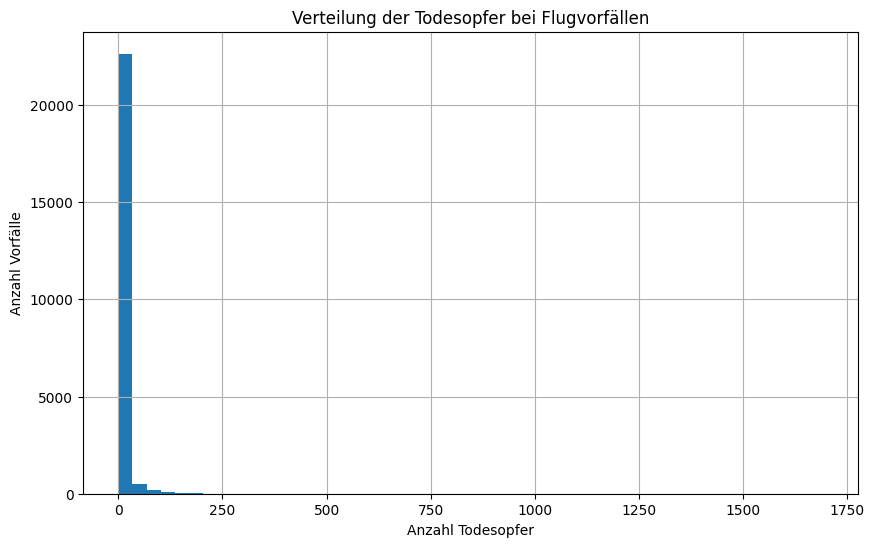

In [10]:
import matplotlib.pyplot as plt

# Histogramm erstellen
plt.figure(figsize=(10, 6))
df["Fatalities"].dropna().hist(bins=50)
plt.title("Verteilung der Todesopfer bei Flugvorfällen")
plt.xlabel("Anzahl Todesopfer")
plt.ylabel("Anzahl Vorfälle")
plt.grid(True)
plt.show()

### 2.4 Skalieren Sie mindestens ein Datenfeld; oder argumentieren Sie in weiteren 50 bis 100 Wörtern in Ihrem Notizbuch, warum dies bei Ihrem Datensatz nicht sinnvoll ist.

In diesem Datensatz ist eine Skalierung der Daten grundsätzlich möglich, aber für die grundlegende Analyse nicht zwingend notwendig. Da wir hauptsächlich die Anzahl von Personen und Todesfällen betrachten – also klar interpretierbare numerische Größen – behalten diese Felder auch ohne Skalierung ihre Bedeutung. Zudem wird in vielen statistischen Auswertungen wie Mittelwerten, Histogrammen oder Regressionsmodellen mit linearen Beziehungen keine Skalierung vorausgesetzt. Eine Skalierung ist eher bei maschinellen Lernmodellen oder wenn verschiedene Größenordnungen miteinander kombiniert werden notwendig.

Es gibt 2 Hauptgründe warum Skalierung Sinnvoll ist


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialisieren des Scalers
scaler = MinMaxScaler()

# Skalieren der Spalte "Fatalities"
df["Fatalities_scaled"] = scaler.fit_transform(df[["Fatalities"]])

# Ausgabe der ersten Werte zum Vergleich
print(df[["Fatalities", "Fatalities_scaled"]].head(20))



    Fatalities  Fatalities_scaled
0            0           0.000000
1            0           0.000000
2            0           0.000000
3            0           0.000000
4            0           0.000000
5            0           0.000000
6            0           0.000000
7            0           0.000000
8            0           0.000000
9            2           0.001182
10           0           0.000000
11           0           0.000000
12           0           0.000000
13           0           0.000000
14          62           0.036643
15           1           0.000591
16           4           0.002364
17           0           0.000000
18           0           0.000000
19           0           0.000000


you see that even 62 Fatalities are still much lower than the maximum.